In [25]:
import cv2
import numpy as np

In [29]:
width = 800
height = 800
canvas = np.ones((height, width, 3), dtype=np.uint8) * 255

#luu bien toan cuc
drawing = False
pt1 = (-1, -1)
pt2 = (-1, -1)

In [ ]:
def translation(tx,ty):
    M = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return M 
def rotation(angle_deg , center):
    angle_deg = math.radians(angle_deg)
    cx , cy = center
    T1 = translation(-cx, -cy)
    T2 = translation(cx, cy)
    R = np.array([
                    [np.cos(angle_deg), -np.sin(angle_deg), 0],
                    [np.sin(angle_deg), np.cos(angle_deg), 0],
                    [0, 0, 1]
                ])
    return T1 @ R @ T2

def scale(sx, sy, center):
    cx, cy = center
    T1 = translation(-cx, -cy)
    T2 = translation(cx, cy)
    S = np.array([
                    [sx, 0, 0],
                    [0, sy, 0],
                    [0, 0, 1]
                ])
    return T1 @ S @ T2

In [34]:
def draw_rectangle(img, pt1, pt2,color = (0, 0, 255)):
    cv2.rectangle(img, pt1, pt2, color, 2)
def mouse_callback(event, x, y, flags, param):
    global drawing,pt1,pt2
    temp = canvas.copy()
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True 
        pt1 = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        pt2 = (x, y)
        draw_rectangle(temp, pt1, pt2)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        pt2 = (x, y)
        draw_rectangle(canvas, pt1, pt2)
    cv2.imshow("Canvas", temp)

# Tạo cửa sổ và callback chuột
cv2.namedWindow("Canvas")
cv2.setMouseCallback("Canvas", mouse_callback)

In [35]:
while True:
    cv2.imshow("Canvas", canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break 
    if key == ord('c'):
        canvas = np.ones((height, width, 3), dtype=np.uint8) * 255
cv2.destroyAllWindows()

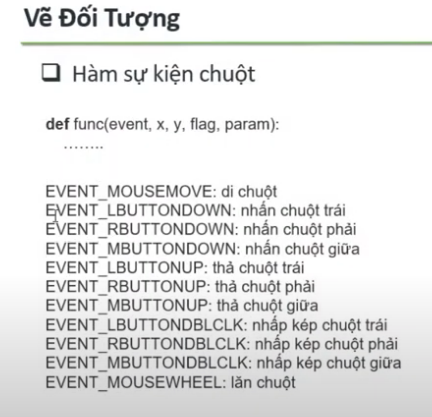